# Examen Módulo 2

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

# ANTES DE EMPEZAR

## Jose Armando Borregui Vidrio 

Escribe tu número de expediente como semilla

In [1]:
import numpy as np
np.random.seed(727516)

empresas = ["Spotify", "Mercado Libre", "Microsoft", "Walmart", "Google", "Tesla", "Netflix", "Amazon", "Oracle", "Intel"]

print("Simulación Monte Carlo - Problema " + str(np.random.choice([1, 2])))
print("Integración Monte Carlo Tipo 1 - Problema " + str(np.random.choice([1, 2])))
print("Integración Monte Carlo Tipo 2 - Función " + str(np.random.choice([1, 2])))
print("Fractales - Fractal " + str(np.random.choice([1, 2])))
print("Probabilidad Precio-Umbral - Empresas: (" + str(np.random.choice(empresas, 2, replace=False)) + ")")

Simulación Monte Carlo - Problema 2
Integración Monte Carlo Tipo 1 - Problema 2
Integración Monte Carlo Tipo 2 - Función 1
Fractales - Fractal 1
Probabilidad Precio-Umbral - Empresas: (['Walmart' 'Netflix'])


In [11]:
import pandas as pd
import numpy as np

---
### Simulación Monte Carlo - Problema 1

Un proyecto de construcción en una casa está por comenzar. Se hace la compra de los materiales y el proveedor dice que en promedio tardan una semana con 2 días de desviación estándar en llegar. Una vez llegados los materiales se tarda entre 2 y 3 semanas en construir (uniforme). Después de la construcción debes esperar 3 días antes de empezar a pintar, y te toma 4 días en promedio con medio día de desviación estándar hacerlo.

1. Define una función que te regrese el tiempo total de inicio a fin de proyecto dados los tiempos que toma cada paso.

In [2]:
def t_total(primer_paso, segundo_paso, tercer_paso) :
    return primer_paso + segundo_paso + 3 + tercer_paso

In [3]:
t_total(1, 2, 3)


9

2. Escribe en una celda de Markdown qué distribución usarías para cada paso del proceso.

1. Materiales:distribuvion normal
2. tiempo de construccion:uniforme 
3. espera: uniforme 
4. pintura: distribucion normal 

3. Simula cada paso en el proceso un millón de veces.

In [98]:

def tmateriales():
    return np.random.normal(7, 2)

def tconstruccion():
    return np.random.uniform(14, 22)

def tespera():
    return np.random.uniform(1,3)

def tpintura():
    return np.random.normal(4,.5)

In [ ]:
resultados

4. Agrupa las simulaciones de cada paso para tener la simulación del proceso completo.

In [ ]:
simulaciones = 1000000
resultados = []

for _ in range(simulaciones):

   
    t_total = tmateriales() + tconstruccion() + tespera() + tpintura()
    resultados.append(t_total)

5. ¿Cuál es el tiempo promedio para el inicio-fin del proyecto?

In [103]:
promedio = np.mean(resultados)
desviacion = np.std(resultados)
promedio

30.998763626816732

6. Dadas tus simulaciones, ¿cuál fue el tiempo mínimo? ¿El máximo?

In [104]:
tiempo_maximo = max(resultados)
tiempo_minimo = min(resultados)

print(f"Tiempo máximo total: {tiempo_maximo} días")
print(f"Tiempo mínimo total: {tiempo_minimo} días")

Tiempo máximo total: 44.53552237105945 días
Tiempo mínimo total: 18.375664183689437 días


7. Grafica un histograma con tus resultados.

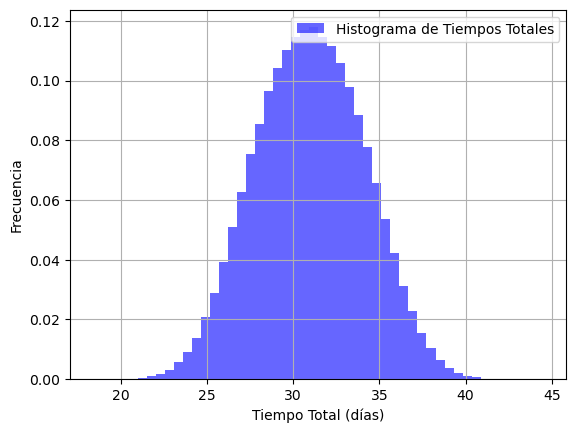

In [105]:
plt.hist(resultados, bins=50, density=True, alpha=0.6, color='b', label='Histograma de Tiempos Totales')
plt.xlabel('Tiempo Total (días)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

### Simulación Monte Carlo - Problema 2

Hay un elevador pequeño en una plaza donde se espera que entren máximo 4 personas a la vez, y su capacidad de peso para poder operar es de 320 kg.

Datos estadísticos de las personas que viven en esa zona mencionan que hay un 49% de mujeres, un 43% de hombres, y un 7% de personas que o prefirieron no contestar la pregunta o se identificaron como no binarias. El peso promedio medido en mujeres es de 68.7 kg con una desviación estándar de 7 kg. En los hombres se midió un peso promedio de 74.8 kg y una desviación estándar de 9 kg. En el tercer grupo se midió un peso promedio de 72 kg con una desviación estándar de 8 kg.

1. Escribe una función que retorne un peso dentro de los estadísticos dados. 

In [1]:
import random

def peso_persona():
    
    genero = random.random()
    if genero <= 0.49:  # Mujer
        return random.normalvariate(68.7, 7)
    elif genero <= 0.92:  # Hombre
        return random.normalvariate(74.8, 9)
    else:  
        return random.normalvariate(72, 8)


2. Si el elevador se llenara 10,000 veces, ¿cuántas de esas veces se excedería el peso permitido?

In [2]:
def simulacion_elevador():
    peso_total = 0
    for _ in range(4):
        peso = peso_persona()
        peso_total += peso
        if peso_total > 320:
            return 1 
    return 0 

simulaciones = 10000
excedidos = sum(simulacion_elevador() for _ in range(simulaciones))

print(f"De las {simulaciones} simulaciones, el elevador se excedió de peso {excedidos} veces.")


De las 10000 simulaciones, el elevador se excedió de peso 266 veces.


---
### Integración Monte Carlo tipo 1 - Problema 1

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{2xe^{-x^2}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [53]:
def montecarlo (f,n,a,b):
  u=np.random.uniform(a,b,n)
  media=np.mean(f(u))
  return media*(b-a)


2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [ ]:
for i in n :
  aproximacion = montecarlo(f,int(i),0,1)
  table.loc[i,"aproximacion"]=aproximacion
  table.loc[i,"error"]=abs(6.73789 - aproximacion)

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

### Integración Monte Carlo tipo 1 - Problema 2

Dadas las funciones

$$ f_1(x) = \sin{(x)}e^{-\frac{x}{10}} + 1$$

$$ f_2(x) = 0.15x $$

$$ x \in [0, 4\pi]$$

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [30]:
def montecarlo (f,n,a,b):
  u=np.random.uniform(a,b,n)
  media=np.mean(f(u))
  return media*(b-a)

2. Defina las funciones dadas como funciones de Python, con argumento de entrada $x$.

In [31]:
import numpy as np

def f(x):
    return np.sin(x)*np.exp(-x/10) + 1

a = 0
b = 4*np.pi
N = 1000000

np.random.seed(14)

u = np.random.uniform(a, b, N)
np.mean(f(u))

1.057381374761645

In [32]:
import numpy as np

def g(x):
    return .15*x

a = 0
b = 4*np.pi
N = 1000

np.random.seed(14)

u = np.random.uniform(a, b, N)
np.mean(g(u))

0.9390898317588909

3. Grafique las funciones en una sola figura. Utiliza el comando `plt.fill_between` para rellenar el área a integrar.

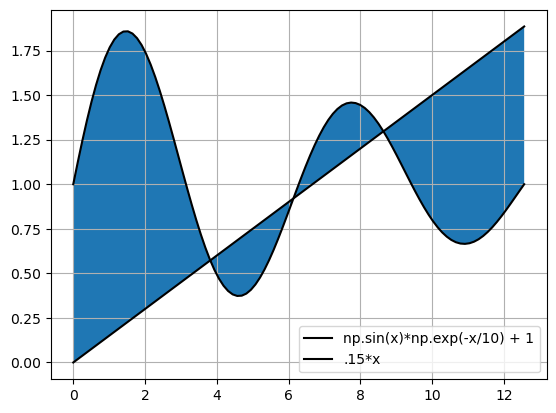

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


x = np.linspace(0, 4*np.pi, 100)
y1 = f(x)
y2 = g(x)
plt.figure()
plt.plot(x, y1, "k", label="np.sin(x)*np.exp(-x/10) + 1")
plt.plot(x, y2, "k", label=".15*x")
plt.fill_between(x, y1, y2)
plt.legend(loc="best")
plt.grid()

4. ¿Cuál es el área del espacio que se llenó después de `plt.fill_between`? Aproxima tu resultado con 1'000,000 puntos.

In [112]:
import numpy as np
import random
import matplotlib.pyplot as plt


def f(x):
  return np.sin(x)*np.exp(-x/10) + 1
a=0
b=
n=1000000
np.random.seed(14)
u1=np.random.uniform(a,b,n)
u1
np.mean(f(u))


2.317849401344221

In [19]:
N = np.logspace(1, 5, 5)
tabla = pd.DataFrame(columns= ["Aproximacion", "Error"], index=N)

for i in N:
    aproximacion = montecarlo(f, int(i), a, b)
    tabla.loc[i, "Aproximacion np.sin(x)*np.exp(-x/10) + 1"] = aproximacion   
    tabla.loc[i, "Error"] = abs(np.mean(f(x)) - aproximacion)  
    
    tabla.loc[i, "Aproximacion .15*x"] = aproximacion   
    tabla.loc[i, "Error"] = abs(np.mean(g(x)) - aproximacion) 
tabla

,Aproximacion,Error,Aproximacion np.sin(x)*np.exp(-x/10) + 1,Aproximacion .15*x
10.0,NaN,14.640649,15.315649,15.315649
100.0,NaN,11.872246,12.547246,12.547246
1000.0,NaN,12.748742,13.423742,13.423742
10000.0,NaN,12.617926,13.292926,13.292926
100000.0,NaN,12.616009,13.291009,13.291009


5. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales ($f_1(x)$, $f_2(x)$, área total)** y el **error** para $N=10^4,\, 10^5,\, 10^6$.

---
### Integración Monte Carlo tipo 2 
Dada una superfice en el espacio $f(x,y)$, una curva de nivel, es el corte transversal donde se cumple $f(x,y)=v$, con $v$ tal que pertenece al dominio de $f$. 



**Función 1:** Encuentre el área de todas las curvas de nivel que cumplan $f(x,y)>v$, donde 
$$
f(x,y)=-xy\,e^{-x^2-y^2},
$$
y $v=0.05$

**Función 2:** Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [2]:
import numpy as np


In [3]:
def fulanito(x, y):
    return np.exp(-.05*(x**2 + y**2)) * np.sin(x**2 + y**2) >= .5

def montecarlo2(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B =  region(x,y)
    AR = (xb - xa) * (yb - ya)
    return np.mean(B)*AR

montecarlo2(fulanito, -1, 1, -1, 1, 500)

2.328

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

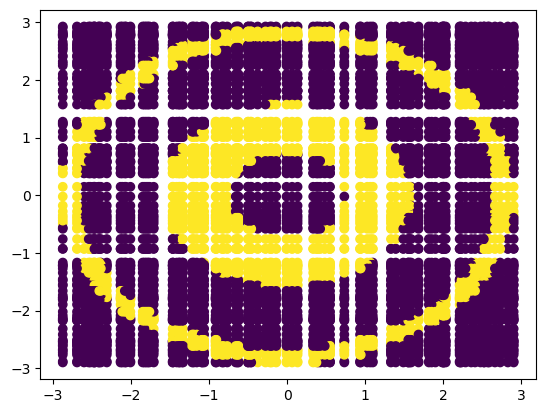

In [22]:
x = np.random.uniform(-3, 3, 100)
y = np.random.uniform(-3, 3, 100)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c = fulanito(X,Y))

los limites son de un cubo de 2 a 2


3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [23]:
def fulanito(x, y):
    return np.exp(-.05*(x*2 + y**2)) * np.sin(x**2 + y**2) >= .5

def montecarlo2(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B =  region(x,y)
    AR = (xb - xa) * (yb - ya)
    return np.mean(B)*AR

montecarlo2(fulanito, -1, 1, -1, 1, 500)

2.36

4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [24]:
# aqui se tiene que hacer la tabla de exponenciales 

In [46]:

N_values = [10**4, 10**5, 10**6]

results_df = pd.DataFrame(columns=['N', 'Integral', 'Error Relativo'])

for N in N_values:
    integral = montecarlo2(fulanito, -1, 1, -1, 1, N)
    error_relativo = np.abs(integral - 2.328) / 2.328
    results_df = results_df.append({'N': N, 'Integral': integral, 'Error Relativo': error_relativo}, ignore_index=True)

print(results_df)



           N  Integral  Error Relativo
0    10000.0  2.295600        0.013918
1   100000.0  2.315960        0.005172
2  1000000.0  2.305692        0.009582


C:\Users\Armando\AppData\Local\Temp\ipykernel_23940\1462530630.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'N': N, 'Integral': integral, 'Error Relativo': error_relativo}, ignore_index=True)
C:\Users\Armando\AppData\Local\Temp\ipykernel_23940\1462530630.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'N': N, 'Integral': integral, 'Error Relativo': error_relativo}, ignore_index=True)
C:\Users\Armando\AppData\Local\Temp\ipykernel_23940\1462530630.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'N': N, 'Integral': integral, 'Error Relativo': error_relativo}, ignore_index=True)


In [48]:
## problema 2
def fulanito(x, y):
    return -x * y * np.exp(-x**2 - y**2)

def montecarlo2(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B =  region(x,y)
    AR = (xb - xa) * (yb - ya)
    return np.mean(B)*AR

montecarlo2(fulanito, -1, 1, -1, 1, 500)

0.011467851886156875

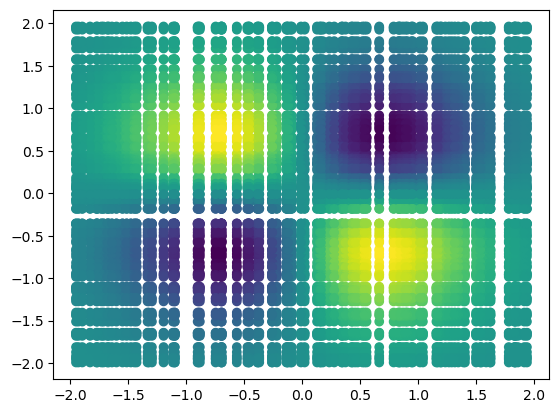

In [50]:
x = np.random.uniform(-2, 2, 100)
y = np.random.uniform(-2, 2, 100)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c = fulanito(X,Y))

In [51]:

N_values = [10**4, 10**5, 10**6]

results_df = pd.DataFrame(columns=['N', 'Integral', 'Error Relativo'])

for N in N_values:
    integral = montecarlo2(fulanito, -2, 2, -2, 2, N)
    error_relativo = np.abs(integral - 0.011467851886156875) / 0.011467851886156875
    results_df = results_df.append({'N': N, 'Integral': integral, 'Error Relativo': error_relativo}, ignore_index=True)

print(results_df)



           N  Integral  Error Relativo
0    10000.0 -0.007842        1.683811
1   100000.0 -0.001650        1.143857
2  1000000.0 -0.000068        1.005943


C:\Users\Armando\AppData\Local\Temp\ipykernel_23940\4150534251.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'N': N, 'Integral': integral, 'Error Relativo': error_relativo}, ignore_index=True)
C:\Users\Armando\AppData\Local\Temp\ipykernel_23940\4150534251.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'N': N, 'Integral': integral, 'Error Relativo': error_relativo}, ignore_index=True)
C:\Users\Armando\AppData\Local\Temp\ipykernel_23940\4150534251.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'N': N, 'Integral': integral, 'Error Relativo': error_relativo}, ignore_index=True)


---
### Generación de fractales

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un cuadro perturbado tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

**Fractal 1:**

In [35]:
import numpy as np

A0 = np.array([[0.5,0.1853,0],
               [0.1667,0.3639,-0.0962],
               [0,0.1555,0.5]])
b0 = np.array([-1.0462,
               -0.8914,
               1.2468]).
reshape(-1, 1)

A1 = np.array([[0.5,0.042,0],
               [-0.1667,0.3639,-0.0962]
               ,[0,-0.2382,0.5]])
b1 = np.array([1.6029,-0.8914,0.2826]).reshape(-1, 1)

A2 = np.array([[0.5,-0.2273,0],[0,-0.3639,0.1925],[0,0.0827,0.5]])
b2 = np.array([-0.5567,-0.8914,-1.5294]).reshape(-1, 1)

A3 = np.array([[0.383,0,0.3214],[0,0.5,0],[-0.3214,0,0.383]])
b3 = np.array([0,1.2247,0]).reshape(-1, 1)

SyntaxError: invalid syntax (1203447018.py, line 8)

In [36]:
import numpy as np

A0 = np.array([[0.5,0.1853,0],[0.1667,0.3639,-0.0962],[0,0.1555,0.5]])
b0 = np.array([-1.0462,-0.8914,1.2468]).reshape(-1, 1)

A1 = np.array([[0.5,0.042,0],[-0.1667,0.3639,-0.0962],[0,-0.2382,0.5]])
b1 = np.array([1.6029,-0.8914,0.2826]).reshape(-1, 1)

A2 = np.array([[0.5,-0.2273,0],[0,-0.3639,0.1925],[0,0.0827,0.5]])
b2 = np.array([-0.5567,-0.8914,-1.5294]).reshape(-1, 1)

A3 = np.array([[0.383,0,0.3214],[0,0.5,0],[-0.3214,0,0.383]])
b3 = np.array([0,1.2247,0]).reshape(-1, 1)

In [37]:
import random
T0 = np.array([
    [0.5,0.1853,0],
    [0.1667,0.3639,-0.0962],
    [0,0.1555,0.5]
])

D0 = np.array([-1.0462,-0.8914,1.2468])

T1 = np.array([
    [0.5,0.042,0],
    [-0.1667,0.3639,-0.0962],
    [0,-0.2382,0.5]
])

D1= np.array([1.6029,-0.8914,0.2826])

T2 = np.array([
    [0.5,-0.2273,0],
    [0,-0.3639,0.1925],
    [0,0.0827,0.5]
])

D2 = np.array([-0.5567,-0.8914,-1.5294])

T3 = np.array([
    [0.383,0,0.3214],
    [0,0.5,0],
    [-0.3214,0,0.383]
])

D3 = np.array([0,1.2247,0])

x = [np.array([0,0,0])]

T = [T0, T1, T2, T3]
D = [D0, D1, D2, D3]

for k in range (100000):
    i = random.choices([0, 1, 2, 3])[0]
    xkm1 = T[i] @ x[-1] + D[i]
    x.append(xkm1)


In [38]:
x = np.array(x)

In [39]:
y = x[:, 1]
z = x[:, 2]
x1 = x[:, 0]

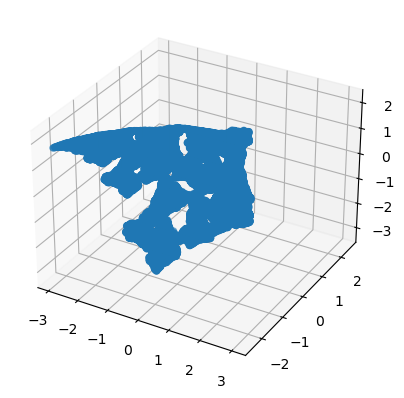

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(x1,y,z)

**Fractal 2:**

In [ ]:
import numpy as np

A0 = np.array([[0,0,0],
               [0,0.18,0],
               [0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

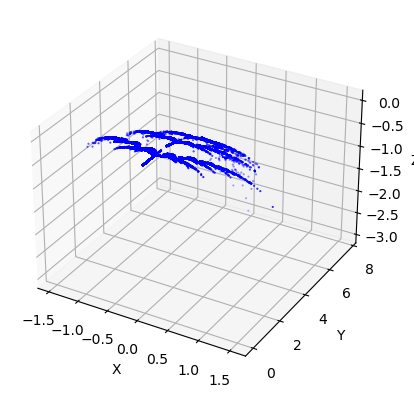

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir las matrices A y los vectores b para cada sistema
A0 = np.array([[0, 0, 0],
               [0, 0.18, 0],
               [0, 0, 0]])
b0 = np.array([0, 0, 0])

A1 = np.array([[0.85, 0, 0],
               [0, 0.85, 0.1],
               [0, -0.1, 0.85]])
b1 = np.array([0, 1.6, 0])

A2 = np.array([[0.2, -0.2, 0],
               [0.2, 0.2, 0],
               [0, 0, 0.3]])
b2 = np.array([0, 0.8, 0])

A3 = np.array([[-0.2, 0.2, 0],
               [0.2, 0.2, 0],
               [0, 0, 0.3]])
b3 = np.array([0, 0.8, 0])

x = [np.array([0, 0, 0])]

A = [A0, A1, A2, A3]
b = [b0, b1, b2, b3]

# Generar puntos del fractal
for k in range(100000):
    i = random.choices([0, 1, 2, 3])[0]
    x_km1 = np.dot(A[i], x[-1]) + b[i]
    x.append(x_km1)

x = np.array(x)
x1 = x[:, 0]
y = x[:, 1]
z = x[:, 2]

# Crear un gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y, z, c='b', marker='.', s=1)

# Configurar etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

---
### Probabilidad Precio-Umbral
Se tiene la siguiente lista de empresas:
- Spotify
- Mercado Libre
- Microsoft
- Walmart
- Google
- Tesla
- Netflix
- Amazon
- Oracle
- Intel

Suponga que desea invertir en dos de ellas. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 30 de septiembre del presente año.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*, donde los argumentos de entrada sean los nombres de las empresas, la fecha de inicio, y la fecha de fin a los cuales se obtendrán los datos.

In [4]:
import yfinance as yf

In [5]:
def getClose(name, start, end) :
    return yf.download(name,start,end)["Adj Close"]

2. Obtenga los precios de cierre ajustados desde el 30 de septiembre de 2021 al 29 de septiembre de 2023.

In [6]:
data = getClose(["NFLX", "WMT"], "2015-01-01", "2019-12-31")
data

[*********************100%%**********************]  2 of 2 completed


,NFLX,WMT
Date,,
2015-01-02,49.848572,71.431717
2015-01-05,47.311428,71.223831
2015-01-06,46.501431,71.772667
2015-01-07,46.742859,73.676956
2015-01-08,47.779999,75.231979
...,...,...
2019-12-23,333.100006,112.169952
2019-12-24,333.200012,112.622292
2019-12-26,332.630005,112.631714


3. Calcule el rendimiento **simple** para ambas empresas.

<Axes: ylabel='Frequency'>

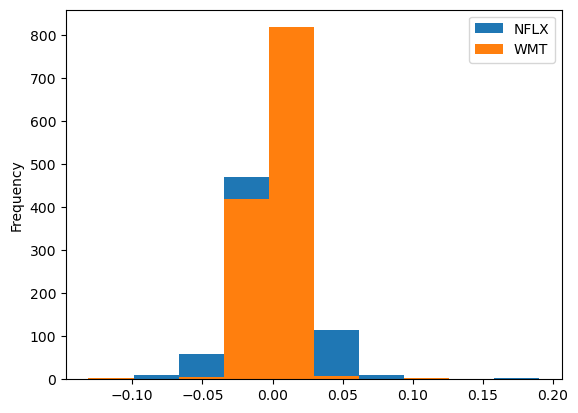

In [7]:

R = (data - data.shift())/data.shift()
R.plot.hist()

4. Escriba una función que, dando como argumentos:
* un vector de valores
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

calcula la media, la desviación estándar, y regrese en un _DataFrame_ de _pandas_ datos simulados de una distribución normal caracterizada cuyo índice sea el rango de fechas dadas como argumentos.

In [11]:
def sim_R(media,std,fecha_inicio,dias,N):
    R_sim =  np.random.normal(media,std,size=(dias,N))
    fechas=pd.date_range(start=fecha_inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=R_sim)
sim_R(0.000438, 0.012342,"2023-10-16",122,100000)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-10-16,0.019352,-0.016375,-0.013266,0.005036,-0.002286,0.008105,-0.001965,-0.009500,-0.005611,0.010727,...,-0.000340,-0.002697,-0.000891,-0.011282,0.008638,-0.014671,-0.002391,-0.017552,-0.024909,-0.014260
2023-10-17,0.016703,0.012164,0.010108,0.003240,0.003424,0.003567,0.008667,0.002755,0.005063,0.011252,...,-0.005632,-0.009746,-0.003606,-0.013892,0.011840,0.014290,0.011154,-0.009468,0.009490,-0.002344
2023-10-18,0.000771,-0.016291,-0.005992,-0.008916,0.008594,0.009390,-0.005511,0.001844,-0.011972,0.001705,...,0.014712,0.015053,-0.001684,-0.008358,-0.003319,-0.002899,-0.019123,0.023890,0.000800,0.029894
2023-10-19,-0.001444,-0.004868,0.002669,-0.027765,0.006535,0.013560,0.003243,-0.006093,0.009372,-0.026460,...,-0.000717,-0.006476,-0.002710,0.020099,-0.020679,-0.006825,-0.008043,-0.004496,0.011923,0.005190
2023-10-20,-0.012465,-0.001774,-0.000211,0.000284,0.007620,0.006146,0.003475,0.007596,0.013943,0.002268,...,0.010469,-0.000425,0.001176,0.007822,-0.002585,0.001188,-0.005580,0.005202,-0.001345,0.012387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-10,0.007900,0.027079,0.017097,-0.004610,-0.000336,0.002557,-0.007961,-0.007891,0.016093,-0.008017,...,0.007488,-0.010003,0.000870,-0.002060,-0.014544,0.023479,0.001272,-0.008595,0.017764,0.000375
2024-02-11,-0.001866,-0.014086,0.003409,0.006947,0.011551,-0.000586,-0.021182,0.021027,0.000818,-0.011187,...,0.013956,0.002984,-0.000236,-0.005073,-0.006011,0.002594,0.019888,-0.009589,-0.004953,-0.026100
2024-02-12,-0.002370,-0.005826,-0.013700,-0.014041,0.006106,0.000787,0.007758,0.003422,0.014778,0.015651,...,-0.006186,0.028945,-0.013871,-0.005975,0.000797,0.000342,-0.016214,-0.009197,0.019187,0.000343
2024-02-13,-0.002637,-0.022312,-0.000248,0.021677,0.011274,0.000984,0.007143,0.004290,-0.014134,0.004652,...,-0.013220,0.013879,0.001647,-0.014967,-0.002779,0.018767,0.016783,0.011768,-0.020469,-0.004321


In [25]:
def sim_R(media,std,fecha_inicio,dias,N):
    R_sim =  np.random.normal(media,std,size=(dias,N))
    fechas=pd.date_range(start=fecha_inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=R_sim)
sim_n=sim_R(0.001830, 0.026263,"2023-03-31",122,100000)
sim_n

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-03-31,0.055895,-0.029136,0.024696,-0.002071,0.012341,0.050448,-0.014569,0.018650,0.020141,0.021256,...,-0.024327,0.016558,0.010824,0.003854,0.028652,0.050249,0.034807,0.019873,0.027095,0.012939
2023-04-01,-0.008645,-0.001707,-0.016927,0.016121,-0.022848,-0.009254,-0.005842,0.044291,0.039461,0.024582,...,-0.017594,0.031947,0.035344,0.006934,0.022649,-0.063597,0.008729,0.009052,0.005243,0.031006
2023-04-02,-0.021797,0.032809,-0.034351,0.000457,-0.029855,-0.007354,-0.027452,-0.011730,0.071120,0.027589,...,-0.026336,0.033678,0.003470,-0.007423,0.007855,0.031073,0.029188,-0.013689,0.015854,0.024382
2023-04-03,-0.025270,0.010571,-0.008322,-0.024273,-0.006367,0.004445,0.049952,0.023706,0.017541,-0.032789,...,0.027012,0.046738,-0.049092,0.021907,-0.008007,0.019908,0.057039,0.034141,0.024219,0.034244
2023-04-04,0.020909,0.012233,-0.024960,-0.044048,-0.000694,0.004518,-0.030453,-0.007017,0.072854,-0.012569,...,-0.039609,-0.011102,-0.005724,-0.024276,0.026734,0.019920,0.005504,0.004230,-0.001757,0.027346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,0.039958,0.070264,-0.003763,0.038945,0.001767,-0.044122,-0.007047,0.003177,0.007117,-0.069905,...,-0.022961,-0.019422,0.004344,-0.022449,-0.009871,-0.011442,-0.016217,0.010573,0.000243,-0.021611
2023-07-27,-0.003414,0.030813,0.028942,0.025141,0.010763,0.013681,0.015154,0.005715,0.018007,0.000341,...,-0.028921,0.021004,-0.018259,-0.006361,-0.000725,0.036261,0.030048,-0.047986,0.009534,0.011034
2023-07-28,0.044103,0.023941,-0.011806,-0.025690,0.005319,-0.015978,-0.010568,0.000543,-0.006594,0.014551,...,0.011755,0.008212,0.011492,0.001705,0.007341,-0.024342,0.005745,-0.022947,0.006732,-0.018360
2023-07-29,-0.001019,-0.013921,0.022180,-0.009288,0.029080,-0.034990,-0.036188,-0.015570,0.015520,0.003502,...,0.002702,0.015957,0.010269,0.021159,-0.053317,0.021869,-0.028173,0.039116,-0.043850,-0.020974


5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de marzo de 2023 al 31 de julio de 2023.

In [26]:
R.mean()


NFLX   -0.000315
WMT     0.000462
dtype: float64

In [27]:
R.std()

NFLX    0.034869
WMT     0.013533
dtype: float64

6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

In [28]:


precios_proyectados = data["2023-03-31"] * (1 + sim).cumprod()

retorno_objetivo = 0.10
probabilidad_NFLX = (sim_n["NFLX"] >= retorno_objetivo).mean()
probabilidad_WMT = (sim-["WMT"] >= retorno_objetivo).mean()

KeyError: '2023-03-31'

7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?